<font size=10><br>Covid Sentiment Scrape</font>

# Tweet Scraping for COVID-19 Tweets

## Imports

In [ ]:
import csv
import json

import matplotlib.pyplot as plt

import re
import seaborn as sns
import snscrape
import tweepy
import pandas as pd

## Use API to get Tweet text and meta data

The first step is to use  <b>Tweepy</b> to get meta-data on all tweets in the dataset that can be found <a href='# https://ieee-dataport.org/open-access/coronavirus-covid-19-geo-tagged-tweets-dataset#files'>HERE</a>, created by IEEE DataPort. This dataset includes Tweet URL's and the corresponding sentiment score.

In [2]:
# Input API and Access tokens

consumer_key = 'SbKSnTmMAarrMpYxjYCXUFJnf'
consumer_secret = 'LKIUvARO8EGTJ7LsJSSs1BG1pFZvNXOHYw1ExeqXHAof0u5GlG'
access_token = '1324933189824110593-hhqL3P8GrzgRCWoIbbdlPSMbHrhTi6'
access_token_secret = '2l0FA1jC8GjjEawIk04JrL1qgF5ItzNb9xvCJfHpZHMcl'

# Set Authorization and API

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Test for functional authorization

try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

In [3]:
# Import and combine data sets that were manually downloaded and organized 

april_may_tweets = pd.read_csv('data/covid_tweets/april_may_tweets.csv')
august_september_tweets = pd.read_csv('data/covid_tweets/august_september_tweets.csv')
june_july_tweets = pd.read_csv('data/covid_tweets/june_july_tweets.csv')
october_november_tweets = pd.read_csv('data/covid_tweets/october_november_tweets.csv')

full_id_table = pd.concat([april_may_tweets, june_july_tweets, august_september_tweets, october_november_tweets])
full_id_table = full_id_table.reset_index()

In [4]:
# Set Iterative chunk of ID's to scrape a limited amount of Tweets at once

ids = full_id_table.Id.to_list()

total_count = len(ids)
chunks = (total_count - 1) // 50 + 1

In [5]:
# Test with small sample

sample = api.statuses_lookup(ids[1:100],tweet_mode='extended')

In [6]:
# Check sample

for status in sample: 
    print("The status with ID " + str(status.id) + " was posted at " + str(status.created_at) 
          + ' from '+ str(status.coordinates['coordinates']))

The status with ID 1245275030956544002 was posted at 2020-04-01 09:01:18 from [36.77943, -1.29889]
The status with ID 1245263893682769921 was posted at 2020-04-01 08:17:02 from [6.12745379, 49.64968784]
The status with ID 1245275001563099136 was posted at 2020-04-01 09:01:11 from [-0.32863, 51.2334699]
The status with ID 1245290940148875265 was posted at 2020-04-01 10:04:31 from [-79.3872, 43.648]
The status with ID 1245271705804771328 was posted at 2020-04-01 08:48:05 from [18.4503, 42.4969]
The status with ID 1245239230164434944 was posted at 2020-04-01 06:39:02 from [11.95624, 57.69445]
The status with ID 1245226125636317184 was posted at 2020-04-01 05:46:58 from [-0.08604754, 51.51013381]
The status with ID 1245236933711867905 was posted at 2020-04-01 06:29:55 from [77.219672, 28.631747]
The status with ID 1245241860391665664 was posted at 2020-04-01 06:49:29 from [-122.19581, 47.67777]
The status with ID 1245222478496043009 was posted at 2020-04-01 05:32:28 from [-111.92583895, 33

In [320]:
# define function to fetch tweets, which also exists in project_functions.py

def fetch_tw(ids,filename):
    # create list of statuses using API, and empty pandas df to store tweets 
    list_of_tw_status = api.statuses_lookup(ids, tweet_mode= "extended")
    empty_data = pd.DataFrame()
    
    # for loop to access statuses, username, and timestamp - then update empty_data table
    for status in list_of_tw_status:
            try:
                tweet_elem = {"tweet_id": status._json['id'],
                     "timestamp": status.created_at,
                     "town": status.place.name,
                     "country": status.place.country,
                     "coordinates":status.coordinates['coordinates']}
            except:
                tweet_elem = {"tweet_id": 'error',
                     "timestamp": 'error',
                     "town": 'error',
                     "country": 'error',
                     "coordinates": 'error'} 
            empty_data = empty_data.append(tweet_elem, ignore_index = True)
            
    # write dataframe to csv
    empty_data.to_csv(f"{filename}.csv", mode="a", float_format='%.0f')

In [323]:
# loop through 50-Tweet cycle to bypass API error

for i in range(chunks-1):
        batch = ids[i*50:(i+1)*50]
        print('This script is ' + str(round((i/chunks)*100, 4)) + '% done.')
        result = fetch_tw(batch,'data/full_tweet_details.csv')

This script is 0.0% done.
This script is 0.0149% done.
This script is 0.0298% done.
This script is 0.0447% done.
This script is 0.0596% done.
This script is 0.0745% done.
This script is 0.0894% done.
This script is 0.1044% done.
This script is 0.1193% done.
This script is 0.1342% done.
This script is 0.1491% done.
This script is 0.164% done.
This script is 0.1789% done.
This script is 0.1938% done.
This script is 0.2087% done.
This script is 0.2236% done.
This script is 0.2385% done.
This script is 0.2534% done.
This script is 0.2683% done.
This script is 0.2832% done.
This script is 0.2982% done.
This script is 0.3131% done.
This script is 0.328% done.
This script is 0.3429% done.
This script is 0.3578% done.
This script is 0.3727% done.
This script is 0.3876% done.
This script is 0.4025% done.
This script is 0.4174% done.
This script is 0.4323% done.
This script is 0.4472% done.
This script is 0.4621% done.
This script is 0.477% done.
This script is 0.4919% done.
This script is 0.506

This script is 4.2338% done.
This script is 4.2487% done.
This script is 4.2636% done.
This script is 4.2785% done.
This script is 4.2934% done.
This script is 4.3083% done.
This script is 4.3232% done.
This script is 4.3381% done.
This script is 4.353% done.
This script is 4.3679% done.
This script is 4.3828% done.
This script is 4.3977% done.
This script is 4.4126% done.
This script is 4.4275% done.
This script is 4.4425% done.
This script is 4.4574% done.
This script is 4.4723% done.
This script is 4.4872% done.
This script is 4.5021% done.
This script is 4.517% done.
This script is 4.5319% done.
This script is 4.5468% done.
This script is 4.5617% done.
This script is 4.5766% done.
This script is 4.5915% done.
This script is 4.6064% done.
This script is 4.6213% done.
This script is 4.6363% done.
This script is 4.6512% done.
This script is 4.6661% done.
This script is 4.681% done.
This script is 4.6959% done.
This script is 4.7108% done.
This script is 4.7257% done.
This script is 4.

This script is 8.4675% done.
This script is 8.4824% done.
This script is 8.4973% done.
This script is 8.5122% done.
This script is 8.5271% done.
This script is 8.542% done.
This script is 8.5569% done.
This script is 8.5719% done.
This script is 8.5868% done.
This script is 8.6017% done.
This script is 8.6166% done.
This script is 8.6315% done.
This script is 8.6464% done.
This script is 8.6613% done.
This script is 8.6762% done.
This script is 8.6911% done.
This script is 8.706% done.
This script is 8.7209% done.
This script is 8.7358% done.
This script is 8.7507% done.
This script is 8.7657% done.
This script is 8.7806% done.
This script is 8.7955% done.
This script is 8.8104% done.
This script is 8.8253% done.
This script is 8.8402% done.
This script is 8.8551% done.
This script is 8.87% done.
This script is 8.8849% done.
This script is 8.8998% done.
This script is 8.9147% done.
This script is 8.9296% done.
This script is 8.9445% done.
This script is 8.9595% done.
This script is 8.9

This script is 12.6118% done.
This script is 12.6267% done.
This script is 12.6416% done.
This script is 12.6565% done.
This script is 12.6714% done.
This script is 12.6863% done.
This script is 12.7013% done.
This script is 12.7162% done.
This script is 12.7311% done.
This script is 12.746% done.
This script is 12.7609% done.
This script is 12.7758% done.
This script is 12.7907% done.
This script is 12.8056% done.
This script is 12.8205% done.
This script is 12.8354% done.
This script is 12.8503% done.
This script is 12.8652% done.
This script is 12.8801% done.
This script is 12.8951% done.
This script is 12.91% done.
This script is 12.9249% done.
This script is 12.9398% done.
This script is 12.9547% done.
This script is 12.9696% done.
This script is 12.9845% done.
This script is 12.9994% done.
This script is 13.0143% done.
This script is 13.0292% done.
This script is 13.0441% done.
This script is 13.059% done.
This script is 13.0739% done.
This script is 13.0888% done.
This script is

This script is 16.7114% done.
This script is 16.7263% done.
This script is 16.7412% done.
This script is 16.7561% done.
This script is 16.771% done.
This script is 16.7859% done.
This script is 16.8008% done.
This script is 16.8157% done.
This script is 16.8306% done.
This script is 16.8456% done.
This script is 16.8605% done.
This script is 16.8754% done.
This script is 16.8903% done.
This script is 16.9052% done.
This script is 16.9201% done.
This script is 16.935% done.
This script is 16.9499% done.
This script is 16.9648% done.
This script is 16.9797% done.
This script is 16.9946% done.
This script is 17.0095% done.
This script is 17.0244% done.
This script is 17.0394% done.
This script is 17.0543% done.
This script is 17.0692% done.
This script is 17.0841% done.
This script is 17.099% done.
This script is 17.1139% done.
This script is 17.1288% done.
This script is 17.1437% done.
This script is 17.1586% done.
This script is 17.1735% done.
This script is 17.1884% done.
This script i

This script is 20.811% done.
This script is 20.8259% done.
This script is 20.8408% done.
This script is 20.8557% done.
This script is 20.8706% done.
This script is 20.8855% done.
This script is 20.9004% done.
This script is 20.9153% done.
This script is 20.9302% done.
This script is 20.9451% done.
This script is 20.96% done.
This script is 20.975% done.
This script is 20.9899% done.
This script is 21.0048% done.
This script is 21.0197% done.
This script is 21.0346% done.
This script is 21.0495% done.
This script is 21.0644% done.
This script is 21.0793% done.
This script is 21.0942% done.
This script is 21.1091% done.
This script is 21.124% done.
This script is 21.1389% done.
This script is 21.1538% done.
This script is 21.1688% done.
This script is 21.1837% done.
This script is 21.1986% done.
This script is 21.2135% done.
This script is 21.2284% done.
This script is 21.2433% done.
This script is 21.2582% done.
This script is 21.2731% done.
This script is 21.288% done.
This script is 2

This script is 24.9106% done.
This script is 24.9255% done.
This script is 24.9404% done.
This script is 24.9553% done.
This script is 24.9702% done.
This script is 24.9851% done.
This script is 25.0% done.
This script is 25.0149% done.
This script is 25.0298% done.
This script is 25.0447% done.
This script is 25.0596% done.
This script is 25.0745% done.
This script is 25.0894% done.
This script is 25.1044% done.
This script is 25.1193% done.
This script is 25.1342% done.
This script is 25.1491% done.
This script is 25.164% done.
This script is 25.1789% done.
This script is 25.1938% done.
This script is 25.2087% done.
This script is 25.2236% done.
This script is 25.2385% done.
This script is 25.2534% done.
This script is 25.2683% done.
This script is 25.2832% done.
This script is 25.2982% done.
This script is 25.3131% done.
This script is 25.328% done.
This script is 25.3429% done.
This script is 25.3578% done.
This script is 25.3727% done.
This script is 25.3876% done.
This script is 

This script is 29.0101% done.
This script is 29.025% done.
This script is 29.04% done.
This script is 29.0549% done.
This script is 29.0698% done.
This script is 29.0847% done.
This script is 29.0996% done.
This script is 29.1145% done.
This script is 29.1294% done.
This script is 29.1443% done.
This script is 29.1592% done.
This script is 29.1741% done.
This script is 29.189% done.
This script is 29.2039% done.
This script is 29.2188% done.
This script is 29.2338% done.
This script is 29.2487% done.
This script is 29.2636% done.
This script is 29.2785% done.
This script is 29.2934% done.
This script is 29.3083% done.
This script is 29.3232% done.
This script is 29.3381% done.
This script is 29.353% done.
This script is 29.3679% done.
This script is 29.3828% done.
This script is 29.3977% done.
This script is 29.4126% done.
This script is 29.4275% done.
This script is 29.4425% done.
This script is 29.4574% done.
This script is 29.4723% done.
This script is 29.4872% done.
This script is 

This script is 33.1097% done.
This script is 33.1246% done.
This script is 33.1395% done.
This script is 33.1544% done.
This script is 33.1694% done.
This script is 33.1843% done.
This script is 33.1992% done.
This script is 33.2141% done.
This script is 33.229% done.
This script is 33.2439% done.
This script is 33.2588% done.
This script is 33.2737% done.
This script is 33.2886% done.
This script is 33.3035% done.
This script is 33.3184% done.
This script is 33.3333% done.
This script is 33.3482% done.
This script is 33.3631% done.
This script is 33.3781% done.
This script is 33.393% done.
This script is 33.4079% done.
This script is 33.4228% done.
This script is 33.4377% done.
This script is 33.4526% done.
This script is 33.4675% done.
This script is 33.4824% done.
This script is 33.4973% done.
This script is 33.5122% done.
This script is 33.5271% done.
This script is 33.542% done.
This script is 33.5569% done.
This script is 33.5719% done.
This script is 33.5868% done.
This script i

This script is 37.2093% done.
This script is 37.2242% done.
This script is 37.2391% done.
This script is 37.254% done.
This script is 37.2689% done.
This script is 37.2838% done.
This script is 37.2987% done.
This script is 37.3137% done.
This script is 37.3286% done.
This script is 37.3435% done.
This script is 37.3584% done.
This script is 37.3733% done.
This script is 37.3882% done.
This script is 37.4031% done.
This script is 37.418% done.
This script is 37.4329% done.
This script is 37.4478% done.
This script is 37.4627% done.
This script is 37.4776% done.
This script is 37.4925% done.
This script is 37.5075% done.
This script is 37.5224% done.
This script is 37.5373% done.
This script is 37.5522% done.
This script is 37.5671% done.
This script is 37.582% done.
This script is 37.5969% done.
This script is 37.6118% done.
This script is 37.6267% done.
This script is 37.6416% done.
This script is 37.6565% done.
This script is 37.6714% done.
This script is 37.6863% done.
This script i

This script is 41.3089% done.
This script is 41.3238% done.
This script is 41.3387% done.
This script is 41.3536% done.
This script is 41.3685% done.
This script is 41.3834% done.
This script is 41.3983% done.
This script is 41.4132% done.
This script is 41.4281% done.
This script is 41.4431% done.
This script is 41.458% done.
This script is 41.4729% done.
This script is 41.4878% done.
This script is 41.5027% done.
This script is 41.5176% done.
This script is 41.5325% done.
This script is 41.5474% done.
This script is 41.5623% done.
This script is 41.5772% done.
This script is 41.5921% done.
This script is 41.607% done.
This script is 41.6219% done.
This script is 41.6369% done.
This script is 41.6518% done.
This script is 41.6667% done.
This script is 41.6816% done.
This script is 41.6965% done.
This script is 41.7114% done.
This script is 41.7263% done.
This script is 41.7412% done.
This script is 41.7561% done.
This script is 41.771% done.
This script is 41.7859% done.
This script i

This script is 45.4085% done.
This script is 45.4234% done.
This script is 45.4383% done.
This script is 45.4532% done.
This script is 45.4681% done.
This script is 45.483% done.
This script is 45.4979% done.
This script is 45.5128% done.
This script is 45.5277% done.
This script is 45.5426% done.
This script is 45.5575% done.
This script is 45.5725% done.
This script is 45.5874% done.
This script is 45.6023% done.
This script is 45.6172% done.
This script is 45.6321% done.
This script is 45.647% done.
This script is 45.6619% done.
This script is 45.6768% done.
This script is 45.6917% done.
This script is 45.7066% done.
This script is 45.7215% done.
This script is 45.7364% done.
This script is 45.7513% done.
This script is 45.7662% done.
This script is 45.7812% done.
This script is 45.7961% done.
This script is 45.811% done.
This script is 45.8259% done.
This script is 45.8408% done.
This script is 45.8557% done.
This script is 45.8706% done.
This script is 45.8855% done.
This script i

This script is 49.5081% done.
This script is 49.523% done.
This script is 49.5379% done.
This script is 49.5528% done.
This script is 49.5677% done.
This script is 49.5826% done.
This script is 49.5975% done.
This script is 49.6124% done.
This script is 49.6273% done.
This script is 49.6422% done.
This script is 49.6571% done.
This script is 49.672% done.
This script is 49.6869% done.
This script is 49.7018% done.
This script is 49.7168% done.
This script is 49.7317% done.
This script is 49.7466% done.
This script is 49.7615% done.
This script is 49.7764% done.
This script is 49.7913% done.
This script is 49.8062% done.
This script is 49.8211% done.
This script is 49.836% done.
This script is 49.8509% done.
This script is 49.8658% done.
This script is 49.8807% done.
This script is 49.8956% done.
This script is 49.9106% done.
This script is 49.9255% done.
This script is 49.9404% done.
This script is 49.9553% done.
This script is 49.9702% done.
This script is 49.9851% done.
This script i

This script is 53.6076% done.
This script is 53.6225% done.
This script is 53.6374% done.
This script is 53.6524% done.
This script is 53.6673% done.
This script is 53.6822% done.
This script is 53.6971% done.
This script is 53.712% done.
This script is 53.7269% done.
This script is 53.7418% done.
This script is 53.7567% done.
This script is 53.7716% done.
This script is 53.7865% done.
This script is 53.8014% done.
This script is 53.8163% done.
This script is 53.8312% done.
This script is 53.8462% done.
This script is 53.8611% done.
This script is 53.876% done.
This script is 53.8909% done.
This script is 53.9058% done.
This script is 53.9207% done.
This script is 53.9356% done.
This script is 53.9505% done.
This script is 53.9654% done.
This script is 53.9803% done.
This script is 53.9952% done.
This script is 54.0101% done.
This script is 54.025% done.
This script is 54.04% done.
This script is 54.0549% done.
This script is 54.0698% done.
This script is 54.0847% done.
This script is 

This script is 57.7072% done.
This script is 57.7221% done.
This script is 57.737% done.
This script is 57.7519% done.
This script is 57.7668% done.
This script is 57.7818% done.
This script is 57.7967% done.
This script is 57.8116% done.
This script is 57.8265% done.
This script is 57.8414% done.
This script is 57.8563% done.
This script is 57.8712% done.
This script is 57.8861% done.
This script is 57.901% done.
This script is 57.9159% done.
This script is 57.9308% done.
This script is 57.9457% done.
This script is 57.9606% done.
This script is 57.9756% done.
This script is 57.9905% done.
This script is 58.0054% done.
This script is 58.0203% done.
This script is 58.0352% done.
This script is 58.0501% done.
This script is 58.065% done.
This script is 58.0799% done.
This script is 58.0948% done.
This script is 58.1097% done.
This script is 58.1246% done.
This script is 58.1395% done.
This script is 58.1544% done.
This script is 58.1694% done.
This script is 58.1843% done.
This script i

This script is 61.8068% done.
This script is 61.8217% done.
This script is 61.8366% done.
This script is 61.8515% done.
This script is 61.8664% done.
This script is 61.8813% done.
This script is 61.8962% done.
This script is 61.9112% done.
This script is 61.9261% done.
This script is 61.941% done.
This script is 61.9559% done.
This script is 61.9708% done.
This script is 61.9857% done.
This script is 62.0006% done.
This script is 62.0155% done.
This script is 62.0304% done.
This script is 62.0453% done.
This script is 62.0602% done.
This script is 62.0751% done.
This script is 62.09% done.
This script is 62.1049% done.
This script is 62.1199% done.
This script is 62.1348% done.
This script is 62.1497% done.
This script is 62.1646% done.
This script is 62.1795% done.
This script is 62.1944% done.
This script is 62.2093% done.
This script is 62.2242% done.
This script is 62.2391% done.
This script is 62.254% done.
This script is 62.2689% done.
This script is 62.2838% done.
This script is

This script is 65.9064% done.
This script is 65.9213% done.
This script is 65.9362% done.
This script is 65.9511% done.
This script is 65.966% done.
This script is 65.9809% done.
This script is 65.9958% done.
This script is 66.0107% done.
This script is 66.0256% done.
This script is 66.0405% done.
This script is 66.0555% done.
This script is 66.0704% done.
This script is 66.0853% done.
This script is 66.1002% done.
This script is 66.1151% done.
This script is 66.13% done.
This script is 66.1449% done.
This script is 66.1598% done.
This script is 66.1747% done.
This script is 66.1896% done.
This script is 66.2045% done.
This script is 66.2194% done.
This script is 66.2343% done.
This script is 66.2493% done.
This script is 66.2642% done.
This script is 66.2791% done.
This script is 66.294% done.
This script is 66.3089% done.
This script is 66.3238% done.
This script is 66.3387% done.
This script is 66.3536% done.
This script is 66.3685% done.
This script is 66.3834% done.
This script is

This script is 70.006% done.
This script is 70.0209% done.
This script is 70.0358% done.
This script is 70.0507% done.
This script is 70.0656% done.
This script is 70.0805% done.
This script is 70.0954% done.
This script is 70.1103% done.
This script is 70.1252% done.
This script is 70.1401% done.
This script is 70.155% done.
This script is 70.1699% done.
This script is 70.1849% done.
This script is 70.1998% done.
This script is 70.2147% done.
This script is 70.2296% done.
This script is 70.2445% done.
This script is 70.2594% done.
This script is 70.2743% done.
This script is 70.2892% done.
This script is 70.3041% done.
This script is 70.319% done.
This script is 70.3339% done.
This script is 70.3488% done.
This script is 70.3637% done.
This script is 70.3787% done.
This script is 70.3936% done.
This script is 70.4085% done.
This script is 70.4234% done.
This script is 70.4383% done.
This script is 70.4532% done.
This script is 70.4681% done.
This script is 70.483% done.
This script is

This script is 74.1055% done.
This script is 74.1205% done.
This script is 74.1354% done.
This script is 74.1503% done.
This script is 74.1652% done.
This script is 74.1801% done.
This script is 74.195% done.
This script is 74.2099% done.
This script is 74.2248% done.
This script is 74.2397% done.
This script is 74.2546% done.
This script is 74.2695% done.
This script is 74.2844% done.
This script is 74.2993% done.
This script is 74.3143% done.
This script is 74.3292% done.
This script is 74.3441% done.
This script is 74.359% done.
This script is 74.3739% done.
This script is 74.3888% done.
This script is 74.4037% done.
This script is 74.4186% done.
This script is 74.4335% done.
This script is 74.4484% done.
This script is 74.4633% done.
This script is 74.4782% done.
This script is 74.4931% done.
This script is 74.5081% done.
This script is 74.523% done.
This script is 74.5379% done.
This script is 74.5528% done.
This script is 74.5677% done.
This script is 74.5826% done.
This script i

This script is 78.2051% done.
This script is 78.22% done.
This script is 78.2349% done.
This script is 78.2499% done.
This script is 78.2648% done.
This script is 78.2797% done.
This script is 78.2946% done.
This script is 78.3095% done.
This script is 78.3244% done.
This script is 78.3393% done.
This script is 78.3542% done.
This script is 78.3691% done.
This script is 78.384% done.
This script is 78.3989% done.
This script is 78.4138% done.
This script is 78.4287% done.
This script is 78.4436% done.
This script is 78.4586% done.
This script is 78.4735% done.
This script is 78.4884% done.
This script is 78.5033% done.
This script is 78.5182% done.
This script is 78.5331% done.
This script is 78.548% done.
This script is 78.5629% done.
This script is 78.5778% done.
This script is 78.5927% done.
This script is 78.6076% done.
This script is 78.6225% done.
This script is 78.6374% done.
This script is 78.6524% done.
This script is 78.6673% done.
This script is 78.6822% done.
This script is

This script is 82.3047% done.
This script is 82.3196% done.
This script is 82.3345% done.
This script is 82.3494% done.
This script is 82.3643% done.
This script is 82.3792% done.
This script is 82.3942% done.
This script is 82.4091% done.
This script is 82.424% done.
This script is 82.4389% done.
This script is 82.4538% done.
This script is 82.4687% done.
This script is 82.4836% done.
This script is 82.4985% done.
This script is 82.5134% done.
This script is 82.5283% done.
This script is 82.5432% done.
This script is 82.5581% done.
This script is 82.573% done.
This script is 82.588% done.
This script is 82.6029% done.
This script is 82.6178% done.
This script is 82.6327% done.
This script is 82.6476% done.
This script is 82.6625% done.
This script is 82.6774% done.
This script is 82.6923% done.
This script is 82.7072% done.
This script is 82.7221% done.
This script is 82.737% done.
This script is 82.7519% done.
This script is 82.7668% done.
This script is 82.7818% done.
This script is

This script is 86.4043% done.
This script is 86.4192% done.
This script is 86.4341% done.
This script is 86.449% done.
This script is 86.4639% done.
This script is 86.4788% done.
This script is 86.4937% done.
This script is 86.5086% done.
This script is 86.5236% done.
This script is 86.5385% done.
This script is 86.5534% done.
This script is 86.5683% done.
This script is 86.5832% done.
This script is 86.5981% done.
This script is 86.613% done.
This script is 86.6279% done.
This script is 86.6428% done.
This script is 86.6577% done.
This script is 86.6726% done.
This script is 86.6875% done.
This script is 86.7024% done.
This script is 86.7174% done.
This script is 86.7323% done.
This script is 86.7472% done.
This script is 86.7621% done.
This script is 86.777% done.
This script is 86.7919% done.
This script is 86.8068% done.
This script is 86.8217% done.
This script is 86.8366% done.
This script is 86.8515% done.
This script is 86.8664% done.
This script is 86.8813% done.
This script i

This script is 90.5039% done.
This script is 90.5188% done.
This script is 90.5337% done.
This script is 90.5486% done.
This script is 90.5635% done.
This script is 90.5784% done.
This script is 90.5933% done.
This script is 90.6082% done.
This script is 90.6231% done.
This script is 90.638% done.
This script is 90.653% done.
This script is 90.6679% done.
This script is 90.6828% done.
This script is 90.6977% done.
This script is 90.7126% done.
This script is 90.7275% done.
This script is 90.7424% done.
This script is 90.7573% done.
This script is 90.7722% done.
This script is 90.7871% done.
This script is 90.802% done.
This script is 90.8169% done.
This script is 90.8318% done.
This script is 90.8468% done.
This script is 90.8617% done.
This script is 90.8766% done.
This script is 90.8915% done.
This script is 90.9064% done.
This script is 90.9213% done.
This script is 90.9362% done.
This script is 90.9511% done.
This script is 90.966% done.
This script is 90.9809% done.
This script is

This script is 94.6035% done.
This script is 94.6184% done.
This script is 94.6333% done.
This script is 94.6482% done.
This script is 94.6631% done.
This script is 94.678% done.
This script is 94.6929% done.
This script is 94.7078% done.
This script is 94.7227% done.
This script is 94.7376% done.
This script is 94.7525% done.
This script is 94.7674% done.
This script is 94.7823% done.
This script is 94.7973% done.
This script is 94.8122% done.
This script is 94.8271% done.
This script is 94.842% done.
This script is 94.8569% done.
This script is 94.8718% done.
This script is 94.8867% done.
This script is 94.9016% done.
This script is 94.9165% done.
This script is 94.9314% done.
This script is 94.9463% done.
This script is 94.9612% done.
This script is 94.9761% done.
This script is 94.9911% done.
This script is 95.006% done.
This script is 95.0209% done.
This script is 95.0358% done.
This script is 95.0507% done.
This script is 95.0656% done.
This script is 95.0805% done.
This script i

This script is 98.703% done.
This script is 98.7179% done.
This script is 98.7329% done.
This script is 98.7478% done.
This script is 98.7627% done.
This script is 98.7776% done.
This script is 98.7925% done.
This script is 98.8074% done.
This script is 98.8223% done.
This script is 98.8372% done.
This script is 98.8521% done.
This script is 98.867% done.
This script is 98.8819% done.
This script is 98.8968% done.
This script is 98.9117% done.
This script is 98.9267% done.
This script is 98.9416% done.
This script is 98.9565% done.
This script is 98.9714% done.
This script is 98.9863% done.
This script is 99.0012% done.
This script is 99.0161% done.
This script is 99.031% done.
This script is 99.0459% done.
This script is 99.0608% done.
This script is 99.0757% done.
This script is 99.0906% done.
This script is 99.1055% done.
This script is 99.1205% done.
This script is 99.1354% done.
This script is 99.1503% done.
This script is 99.1652% done.
This script is 99.1801% done.
This script i

In [7]:
# Confirm that the table was scraped properly

full_tweet_details = pd.read_csv('data/full_tweet_details.csv',sep=None)

<ipython-input-7-0def773553d3>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  full_tweet_details = pd.read_csv('data/full_tweet_details.csv',sep=None)


In [9]:
# filter out all errors

full_tweet_details = full_tweet_details[full_tweet_details.coordinates != 'coordinates']
full_tweet_details = full_tweet_details[full_tweet_details.coordinates != 'error']

full_tweet_details.to_csv('data/full_tweet_details.csv')

### Extract Latitude and Longitude

In [10]:
# Set lists to split up coordinates into individual latitude and longitude features

latitude_list = []
longitude_list = []

for coordinates in full_tweet_details.coordinates:
    latitude = float(coordinates.split()[0].replace('[', '').replace(',', ''))
    longitude = float(coordinates.split()[1].replace(']', '').replace(',', ''))
    latitude_list.append(latitude)
    longitude_list.append(longitude)

In [11]:
full_tweet_details['latitude'] = latitude_list
full_tweet_details['longitude'] = longitude_list

### Transform Timestamp

In [12]:
# Use the first ten characters (date) to represent the date of the Tweet (no hours, minutes, seconds)

full_tweet_details.timestamp = [x[:10] for x in full_tweet_details.timestamp]

In [13]:
# Create and set list of formatted timestamps

from datetime import date

timestamp_list = []

for timestamp in full_tweet_details.timestamp:
    date = date.fromisoformat(timestamp)
    timestamp_list.append(date)

full_tweet_details.timestamp = timestamp_list

### Visualiize International Tweet Volume - just for fun!

This was out of my own curiosity! Interesting to see where people are Tweeting about COVID outside of the U.S.

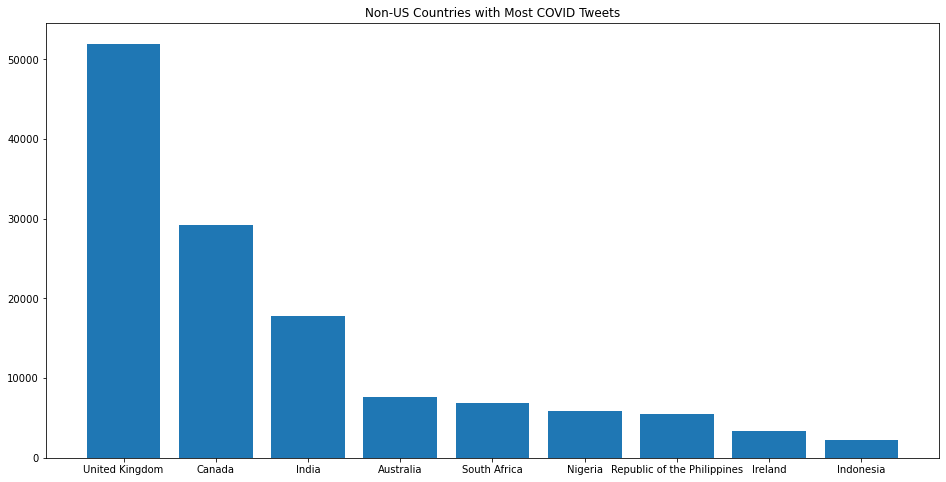

In [14]:
import matplotlib.pyplot as plt

tweet_countries = full_tweet_details.country.value_counts().head(10)
countries_no_US = tweet_countries[1:]


# fig,axs = plt.subplots(1, 2, figsize=(12,6), sharex = True)

fig, ax = plt.subplots(figsize=(16,8))

plt.bar(countries_no_US.index, countries_no_US.head(10))
ax.set_title('Non-US Countries with Most COVID Tweets');
#ax.set_xlabel(tweet_countrotation=10);


## Filter to U.S. tweets only

In [15]:
# Set United States tweets specifically, and remove irrelevant columns

US_tweets = full_tweet_details[full_tweet_details.country=='United States'].reset_index()
US_tweets = US_tweets.drop(columns=['index', 'Unnamed: 0', 'coordinates'])

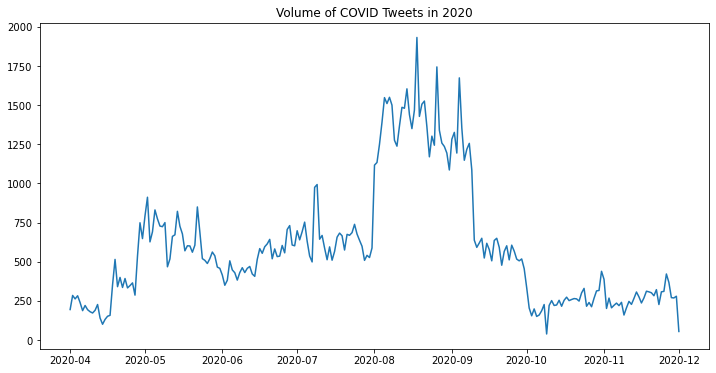

In [16]:
# Visualize COVID Tweets over time in 2020 

fig, ax = plt.subplots(figsize=(12,6))

plt.plot(US_tweets.groupby('timestamp').count().country)
ax.set_title('Volume of COVID Tweets in 2020');

In [17]:
# Set string ID to numeric ID

numeric_list = []

for tweet in US_tweets.tweet_id:
    numeric_tweet = pd.to_numeric(tweet)
    numeric_list.append(numeric_tweet)
    
US_tweets.tweet_id = numeric_list

In [18]:
# Merge table of US tweets with table of tweet ID's and polarity scores

full_id_table.columns = ['index', 'tweet_id', 'polarity']
tweets_merged = pd.merge(US_tweets, full_id_table, on='tweet_id', how='inner')
tweets_merged.columns = ['country', 'timestamp', 'town', 'tweet_id', 'longitude', 'latitude', 'index', 'polarity']
tweets_merged

,country,timestamp,town,tweet_id,longitude,latitude,index,polarity
0,United States,2020-04-01,Kirkland,1.245242e+18,-122.195810,47.677770,31,0.000000
1,United States,2020-04-01,Queens,1.245229e+18,-73.879980,40.742910,16,0.136364
2,United States,2020-04-01,Corona,1.245225e+18,-117.566000,33.875300,8,0.136364
3,United States,2020-04-01,Brooklyn,1.245235e+18,-73.950000,40.650000,22,0.118182
4,United States,2020-04-01,Corona,1.245231e+18,-117.566000,33.875300,17,-0.050000
...,...,...,...,...,...,...,...,...
92253,United States,2020-11-01,Indianapolis,1.322725e+18,-86.172080,39.839699,108731,0.000000
92254,United States,2020-11-01,Indianapolis,1.322730e+18,-86.172080,39.839699,108745,1.000000
92255,United States,2020-11-01,Vermont,1.322736e+18,-72.418333,43.645556,108758,0.000000
92256,United States,2020-11-01,Las Vegas,1.322728e+18,-115.149000,36.167500,108738,0.000000


### View Polarity Change over Time

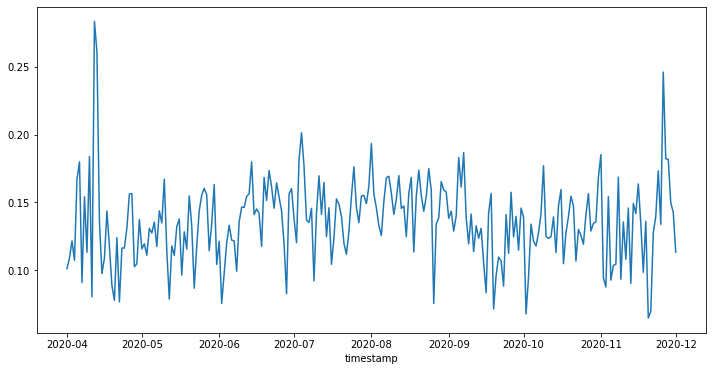

In [19]:
polarity_over_time = tweets_merged.groupby('timestamp').mean()['polarity']

fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x=polarity_over_time.index, y=polarity_over_time.values);

# Adding GeoData

## PGeoCode

In [24]:
!pip install pgeocode

import pgeocode

nomi = pgeocode.Nominatim('us')

import pandas as pd

zip_codes = pd.read_csv('data/zip_code_to_lat_long.csv')

In [25]:
zip_codes

,country,zip,area_name,full_state,state,region,region_code,Unnamed: 7,Unnamed: 8,latitude,longitude
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914
...,...,...,...,...,...,...,...,...,...,...,...
41465,US,96558,APO AA,NaN,NaN,NaN,NaN,NaN,NaN,19.7542,-155.5858
41466,US,96598,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,-89.9976,139.2729
41467,US,96599,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,-77.8460,166.6760
41468,US,96860,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,21.3448,-157.9774


In [26]:
len(pd.merge(tweets_merged, zip_codes, on=['latitude', 'longitude'], how='inner'))

55

<br><b>The merge from tweets directly to Zip Code returned less than fifty results, so the closest pair of coordinates for a known zip code was found for each set of Tweet coordinates.</b><br><br>

## Finding closest known Zip Code for each Tweet

In [21]:
import mpu

def distance(point1, point2):
    return mpu.haversine_distance(point1, point2)

def closest(data, this_point):
    return min(data, key=lambda x: distance(this_point, x))

In [27]:
# Create list of ALL POTENTIAL COORDINATE PAIRS from Zip Codes file 
potential_coordinates = list(zip(zip_codes.latitude, zip_codes.longitude))

# Create list of ALL TWEETS MERGED COORDINATE PAIRS
tweet_coordinates = list(zip(tweets_merged.latitude, tweets_merged.longitude))

In [28]:
# Find closest coordinate to be matched to Zip Code for each Tweet 

closest_list = []

for tweet in tweet_coordinates:
    closest_coordinates = closest(potential_coordinates, tweet)
    closest_list.append(closest_coordinates)

In [29]:
tweets_merged['closest_coordinate'] = closest_list

In [30]:
coordinate_list = [] 

for i, coordinates in enumerate(zip_codes.longitude):
    latitude = zip_codes.latitude.iloc[i]
    longitude = zip_codes.longitude.iloc[i]
    string_text = (latitude, longitude)
    
    coordinate_list.append(string_text)
    
zip_codes['closest_coordinate'] = coordinate_list

In [31]:
# Proves there are multiple entries for identical tweet ID's!!! 

tweets_merged.groupby('tweet_id').count().country.unique()

array([ 1,  4,  2,  8, 12])

In [32]:
tweets_merged = tweets_merged.drop_duplicates(subset='tweet_id')

### Assign each Tweet to a Zip Code

In [36]:
# Merge Tweets list with Zip Code values, giving a full list of geographic features for each Tweet

tweets_and_geo = pd.merge(tweets_merged, zip_codes, on='closest_coordinate', how='left').drop_duplicates(subset='tweet_id')

In [37]:
tweets_and_geo.drop(columns=['country_x', 'country_y', 'index', 'Unnamed: 7', 'Unnamed: 8'], inplace=True)
tweets_and_geo.reset_index(drop=True, inplace=True)

In [38]:
tweets_and_geo.columns = ['timestamp', 'town', 'tweet_id', 'orig_longitude', 'orig_latitude', 'polarity',
                         'closest_coordinate', 'zip', 'area_name', 'full_state', 'state', 'region', 
                         'region_code', 'closest_latitude', 'closest_longitude']
tweets_and_geo

,timestamp,town,tweet_id,orig_longitude,orig_latitude,polarity,closest_coordinate,zip,area_name,full_state,state,region,region_code,closest_latitude,closest_longitude
0,2020-04-01,Kirkland,1.245242e+18,-122.195810,47.677770,0.000000,"(47.6786, -122.1894)",98033,Kirkland,Washington,WA,King,33.0,47.6786,-122.1894
1,2020-04-01,Queens,1.245229e+18,-73.879980,40.742910,0.136364,"(40.7365, -73.8779)",11380,Elmhurst,New York,NY,Queens,81.0,40.7365,-73.8779
2,2020-04-01,Corona,1.245225e+18,-117.566000,33.875300,0.136364,"(33.8753, -117.5664)",92877,Corona,California,CA,Riverside,65.0,33.8753,-117.5664
3,2020-04-01,Brooklyn,1.245235e+18,-73.950000,40.650000,0.118182,"(40.6451, -73.945)",11202,Brooklyn,New York,NY,Kings,47.0,40.6451,-73.9450
4,2020-04-01,Corona,1.245231e+18,-117.566000,33.875300,-0.050000,"(33.8753, -117.5664)",92877,Corona,California,CA,Riverside,65.0,33.8753,-117.5664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47370,2020-11-01,Indianapolis,1.322725e+18,-86.172080,39.839699,0.000000,"(39.8299, -86.1794)",46208,Indianapolis,Indiana,IN,Marion,97.0,39.8299,-86.1794
47371,2020-11-01,Indianapolis,1.322730e+18,-86.172080,39.839699,1.000000,"(39.8299, -86.1794)",46208,Indianapolis,Indiana,IN,Marion,97.0,39.8299,-86.1794
47372,2020-11-01,Vermont,1.322736e+18,-72.418333,43.645556,0.000000,"(43.6462, -72.4184)",5059,Quechee,Vermont,VT,Windsor,27.0,43.6462,-72.4184
47373,2020-11-01,Las Vegas,1.322728e+18,-115.149000,36.167500,0.000000,"(36.1725, -115.1414)",89162,Las Vegas,Nevada,NV,Clark,3.0,36.1725,-115.1414


In [39]:
tweets_and_geo.head(5)

,timestamp,town,tweet_id,orig_longitude,orig_latitude,polarity,closest_coordinate,zip,area_name,full_state,state,region,region_code,closest_latitude,closest_longitude
0,2020-04-01,Kirkland,1.245242e+18,-122.19581,47.67777,0.000000,"(47.6786, -122.1894)",98033,Kirkland,Washington,WA,King,33.0,47.6786,-122.1894
1,2020-04-01,Queens,1.245229e+18,-73.87998,40.74291,0.136364,"(40.7365, -73.8779)",11380,Elmhurst,New York,NY,Queens,81.0,40.7365,-73.8779
2,2020-04-01,Corona,1.245225e+18,-117.56600,33.87530,0.136364,"(33.8753, -117.5664)",92877,Corona,California,CA,Riverside,65.0,33.8753,-117.5664
3,2020-04-01,Brooklyn,1.245235e+18,-73.95000,40.65000,0.118182,"(40.6451, -73.945)",11202,Brooklyn,New York,NY,Kings,47.0,40.6451,-73.9450
4,2020-04-01,Corona,1.245231e+18,-117.56600,33.87530,-0.050000,"(33.8753, -117.5664)",92877,Corona,California,CA,Riverside,65.0,33.8753,-117.5664


### Add DMA to table

A list coorelating DMA's and Zip Codes can be found <a href='https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IVXEHT'>here</a>.

In [ ]:
# Read in list of DMA's and Zip Codes and re-name columns

DMA_zip = pd.read_csv('data/DMA_zip.csv')
DMA_zip.columns=['fips', 'country', 'st', 'DMA', 'DMA_name', 'zip']

In [ ]:
# Merge with lists of tweets with geographic data, allowing a fuller list of geographic values

tweets_with_DMA = pd.merge(tweets_and_geo, DMA_zip, on='zip', how='inner')

In [ ]:
tweets_with_DMA.to_csv('data/tweets_with_DMA.csv')

## Visualizing COVID in a DMA

In [ ]:
from project_functions import COVID_sentiment_in_DMA

In [ ]:
COVID_sentiment_in_DMA('US-NY-501')

#### Development of Graphing function (now in project_functions)

In [3]:
def COVID_sentiment_in_DMA(DMA_code):
    
    from project_functions import column_to_datetime
    
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    from matplotlib.dates import MonthLocator

    
    tweets_with_DMA = pd.read_csv('data/tweets_with_DMA.csv')
    
    tweets_with_DMA.timestamp = pd.to_datetime(tweets_with_DMA.timestamp)

    tweet_amount = len(tweets_with_DMA[tweets_with_DMA.geo_code == DMA_code])
    dma_table = tweets_with_DMA[tweets_with_DMA.geo_code == DMA_code].groupby(['timestamp','DMA_name']).mean().reset_index()
    DMA_name = dma_table.DMA_name.iloc[0]

    fig, ax = plt.subplots(figsize=(13,8))

    sns.lineplot(data = dma_table, x = 'timestamp', y = 'polarity', color='darkblue', linewidth=1)
    
    sns.set_theme(style='whitegrid', font='Georgia')
    ax.grid(False)    
    
    #ax.set(ylim=(dma_table.polarity.min(), dma_table.polarity.max())
    plt.ylim(dma_table.polarity.min(), dma_table.polarity.max())

    fig.tight_layout()
    ax.set_title(f'\n COVID Sentiment over Time in {DMA_name} \n({tweet_amount} Tweets)\n\n', fontsize=20)
    ax.set_xlabel('\nMonth (Year: 2020)', fontsize=16)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    # ax.set_yticklabels(['NEGATIVE -    -0.2', '-0.1', '0', '0.1', '0.2', '0.3', 'POSITIVE -    0.4'], fontsize=10)
   
    ax.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_ylabel('Tweet Polarity', fontsize=16, rotation = 0, labelpad=70)
    ax.axhline(y=0, linewidth=1, color='black', alpha=.6, linestyle='--')


    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout();

    plt.savefig(f'visualizations/covid_sentiment/{DMA_name}_COVID_sentiment')



In [4]:
COVID_sentiment_in_DMA('US-CA-862')

NameError: name 'plt' is not defined

In [24]:
tweets_with_DMA.timestamp = pd.to_datetime(tweets_with_DMA.timestamp)

In [35]:
tweets_with_DMA.timestamp.to_timestamp

<bound method Series.to_timestamp of 0       2020-04-01
1       2020-05-04
2       2020-04-01
3       2020-11-12
4       2020-04-01
           ...    
46695   2020-11-01
46696   2020-11-01
46697   2020-11-01
46698   2020-11-01
46699   2020-11-01
Name: timestamp, Length: 46700, dtype: datetime64[ns]>

<ipython-input-6-c35ef94c53b2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['NEGATIVE -    -0.2', '-0.1', '0', '0.1', '0.2', '0.3', 'POSITIVE -    0.4'], fontsize=10)


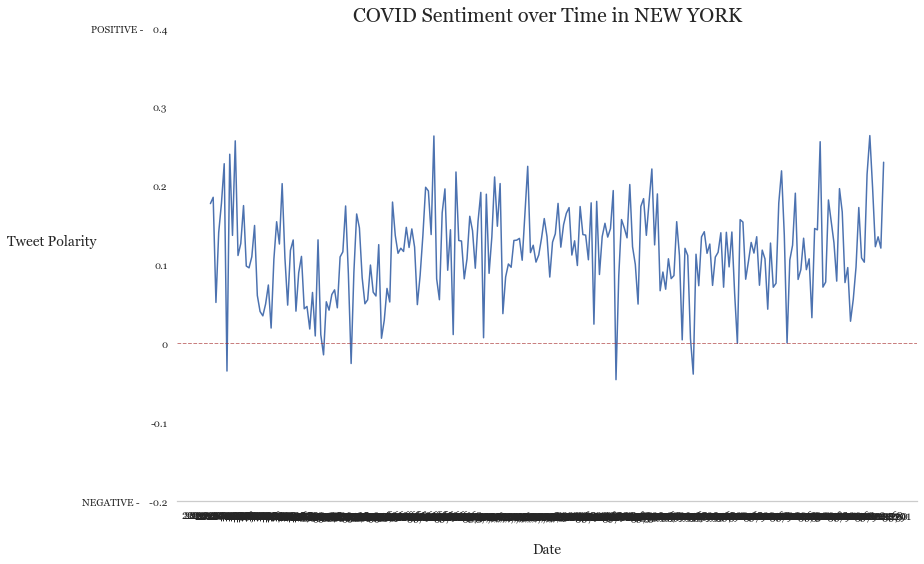

In [6]:
#plt.plot(ny_table.timestamp, ny_table.polarity)



import seaborn as sns
import matplotlib.pyplot as plt

ny_table = tweets_with_DMA[tweets_with_DMA.DMA_name == 'NEW YORK'].groupby(['timestamp','DMA_name']).mean().reset_index()
DMA_name = ny_table.DMA_name.iloc[0]

fig, ax = plt.subplots(figsize=(13,8))

sns.lineplot(data = ny_table, x = 'timestamp', y = 'polarity', palette = 'rocket')

sns.set_theme(style='whitegrid', font='Helvetica')
ax.grid(False)

plt.ylim(-.2,.4)

fig.tight_layout()
ax.set_title(f'COVID Sentiment over Time in {DMA_name}', fontsize=20)
ax.set_xlabel('\nDate', fontsize=14)
ax.set_yticklabels(['NEGATIVE -    -0.2', '-0.1', '0', '0.1', '0.2', '0.3', 'POSITIVE -    0.4'], fontsize=10)
ax.set_ylabel('Tweet Polarity\n', fontsize=14, rotation = 0, labelpad=30)
ax.axhline(y=0, linewidth=1, color='brown', alpha=.6, linestyle='--')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()

#plt.savefig(f'images/Alex_SPOM_polarity')


,timestamp,tweet_id,orig_longitude,orig_latitude,polarity,zip,region_code,closest_latitude,closest_longitude,fips,DMA
0,2020-04-01,1.245358e+18,-73.903213,40.803329,0.177072,10006.666667,53.000000,40.797333,-73.901558,33469.666667,501.0
1,2020-04-02,1.245709e+18,-73.988094,40.673603,0.185057,10197.363636,56.000000,40.674432,-73.990223,35874.181818,501.0
2,2020-04-03,1.246096e+18,-73.936169,40.730146,0.051799,10493.700000,63.500000,40.729815,-73.936785,36063.500000,501.0
3,2020-04-04,1.246420e+18,-73.943833,40.804052,0.140455,10381.050000,66.200000,40.801610,-73.942955,35966.200000,501.0
4,2020-04-05,1.246804e+18,-73.962813,40.758588,0.177669,10294.470588,58.176471,40.755941,-73.964676,35940.529412,501.0
...,...,...,...,...,...,...,...,...,...,...,...
240,2020-11-27,1.332280e+18,-73.984959,40.721906,0.197315,9977.769231,54.076923,40.720962,-73.986162,34707.923077,501.0
241,2020-11-28,1.332707e+18,-73.904522,40.787335,0.122434,9945.625000,54.250000,40.788100,-73.907162,32679.250000,501.0
242,2020-11-29,1.333132e+18,-74.000469,40.674334,0.134991,10131.750000,66.750000,40.668525,-73.991125,35816.750000,501.0
243,2020-11-30,1.333438e+18,-73.972652,40.740766,0.120661,10445.454545,67.000000,40.737736,-73.975700,35885.181818,501.0


## Sampling for Tableau Visualization

In [ ]:
tweets_with_DMA = pd.read_csv('data/tweets_with_DMA.csv')

In [624]:
# Sample of the mean polarity of each state

sample1 = tweets_with_DMA.groupby('full_state').mean().polarity.sort_values(ascending=False)

In [628]:
# Sample of the full count of Tweets in each state

sample2 = tweets_with_DMA.groupby('full_state').count().polarity.sort_values(ascending=False)

In [637]:
# Concat for Tableau Visualization

sample = pd.concat([sample1, sample2], axis=1)
sample.columns=['average_polarity', 'number_of_tweets']

In [638]:
sample.to_csv('sample.csv')

<br><b>Led to this visualization...</b><br><br>

![title](visualizations/tableau/covid_19_sentiment_us.png)